# Creating the dataset

In [9]:
# Load npy files
import numpy as np

# Load the data
images = np.load('data/Challenge/images.npy')
labels = np.load('data/Challenge/labels.npy')

In [10]:
images.shape

(4981, 256, 256, 3)

In [11]:
labels.shape

(4981, 256, 256, 2)

In [12]:
# Get classificaiton
labels = labels[:, :, :, 1]
labels.shape

(4981, 256, 256)

In [13]:
# Get unique values
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=uint16)

In [ ]:
import os
from PIL import Image

#Saves each image in a NumPy array to a specified folder as JPG.
def save_images(np_array, folder_path):
    # Check and create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Loop through each image in the NumPy array
    for i, img in enumerate(np_array):
        # Ensure the image array is in the correct format (uint8)
        if img.dtype != np.uint8:
            img = img.astype(np.uint8)

        # Create an image object and save it
        image = Image.fromarray(img)
        image.save(os.path.join(folder_path, f'image_{i}.jpg'))

# Save the images to a folder
save_images(images, 'data/train_allmasks/images')

In [22]:
# Change the labels to 0 and 255 instead of [0, 1, 2, 3, 4, 5, 6]
def remap_labels(labels, old_range, new_range):
    # Extract the old and new range limits
    old_min, old_max = old_range
    new_min, new_max = new_range

    # Linearly remap the labels
    remapped_labels = (labels - old_min) / (old_max - old_min) * (new_max - new_min) + new_min

    return remapped_labels.astype(int)  # Convert to integer if necessary

remapped_labels = remap_labels(labels, (0, 6), (0, 255))

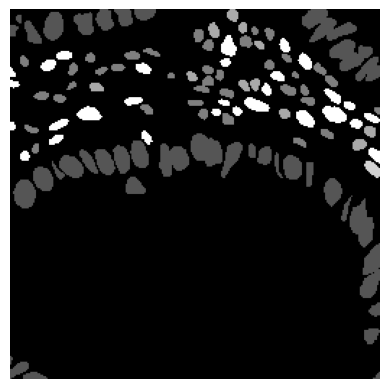

In [24]:
# Plot a remapped label
import matplotlib.pyplot as plt

# Plot the remapped label
plt.imshow(remapped_labels[50], cmap='gray')
plt.axis('off')
plt.show()

In [25]:
# Uqique values
np.unique(remapped_labels)

array([  0,  42,  85, 127, 170, 212, 255])

In [27]:
import os
from PIL import Image

#Saves each label in a NumPy array to a specified folder as JPG.
def save_images(np_array, folder_path):
    # Check and create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Loop through each label in the NumPy array
    for i, img in enumerate(np_array):
        # Ensure the label array is in the correct format (uint8)
        if img.dtype != np.uint8:
            img = img.astype(np.uint8)

        # Create an label object and save it
        image = Image.fromarray(img)
        image.save(os.path.join(folder_path, f'image_{i}.jpg'))

# Save the label to a folder
save_images(remapped_labels, 'data/train_allmasks/labels')